# INTRODUCTION

Attrition in human resources refers to the gradual loss of employees over time. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture and motivation systems that help the organization retain top employees.

This project is to uncover the factors that lead to employee attrition through Exploratory Data Analysis, and explore them by using various classification models to predict if an employee is likely to quit. This could greatly increase the HR’s ability to intervene on time and remedy the situation to prevent attrition


In [320]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [321]:
#create a function to load the data
def load_data(url):
    attrition = pd.read_csv(url)
    return attrition


In [322]:
attrition = load_data('Employee_attrition.csv')

In [323]:
attrition.head(5)

,Age,Resigned,BusinessTravel,DailyRate($),Department,DistanceFromHome(km),EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,Life Sciences,1,2,Female,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Life Sciences,2,3,Male,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,Other,4,4,Male,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Life Sciences,5,4,Female,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Medical,7,1,Male,...,4,80,1,6,3,3,2,2,2,2


In [324]:
#create a function to do exploratory data analysis
def EDA(df):
    info = df.info()
    shape = df.shape
    columns = df.columns
    missing = df.isna().sum()
    return info,shape,columns,missing

In [325]:
#call the function
EDA(attrition)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Resigned                  1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate($)              1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome(km)      1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EmployeeNumber            1470 non-null   int64 
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

(None,
 (1470, 33),
 Index(['Age', 'Resigned', 'BusinessTravel', 'DailyRate($)', 'Department',
        'DistanceFromHome(km)', 'EducationField', 'EmployeeNumber',
        'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
        'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
        'MonthlyIncome($)', 'MonthlyRate($)', 'NumCompaniesWorked', 'Over18',
        'OverTime', 'PercentSalaryHike', 'PerformanceRating',
        'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
        'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
        'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
        'YearsWithCurrManager'],
       dtype='object'),
 Age                         0
 Resigned                    0
 BusinessTravel              0
 DailyRate($)                0
 Department                  0
 DistanceFromHome(km)        0
 EducationField              0
 EmployeeNumber              0
 EnvironmentSatisfaction   

The dataset contains 1470 rows and 33 columns. It has 24 numerical variables and 9 String variables. 
The standard hours variable is in a wrong format, so we have to convert this to the correct format.

In [326]:
# format standard hours to Datetime format 
attrition['StandardHours'] = pd.to_datetime(attrition['StandardHours'])

We can also try to visualise the missing values with a heat map

<AxesSubplot:>

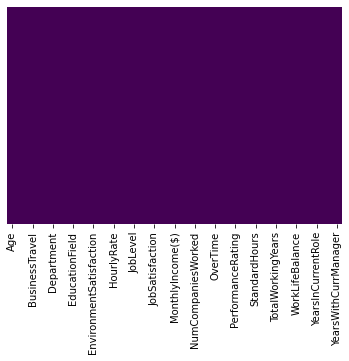

In [327]:
#no missing values, we can also visualise this
sns.heatmap(attrition.isnull(),yticklabels=False,cbar=False,cmap='viridis')

There are no missing values in the dataset as I could vizualise with a heatmap. If there were missing values there would be some yellow points in the dataset

Next, we check for the statistical description of the dataset

In [328]:
#statistical description of the dataset
attrition.describe()

,Age,DailyRate($),DistanceFromHome(km),EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome($),...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### Finding Correlation between the Features

,Age,DailyRate($),DistanceFromHome(km),EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome($),...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,-0.010145,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate($),0.010661,1.000000,-0.004985,-0.050990,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome(km),-0.001686,-0.004985,1.000000,0.032916,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
EmployeeNumber,-0.010145,-0.050990,0.032916,1.000000,0.017621,0.035179,-0.006888,-0.018519,-0.046247,-0.014829,...,-0.020359,-0.069861,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,0.017621,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.035179,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,-0.006888,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,-0.018519,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.046247,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome($),0.497855,0.007707,-0.017014,-0.014829,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,...,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079


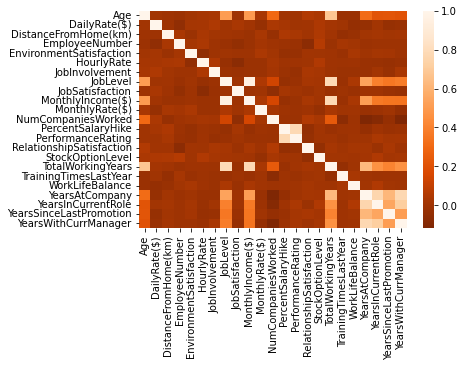

In [329]:
corr=attrition.corr()
sns.heatmap(corr,xticklabels=True,yticklabels=True,cmap='Oranges_r')
corr 

Highly correlated features

Job level vs Monthly Income : 0.950300

Total working years vs Job level : 0.782208

Total working years vs Monthly Income : 0.772893

Age vs Total working years : 0.680381

    
Moderate Positively Correlated Features: 

Age vs Job Level :0.509604

Years at company vs Job level : 0.534739

Age vs monthly incomes : 0.497855 

Years in current role vs Job level : 0.389447

Years since last promotion vs Job level : 0.353885

years with current manager vs Job level : 0.375281

### Changing string data type to categorical data type

In [330]:
attrition['Resigned'] = attrition['Resigned'].astype('category')
attrition['MaritalStatus'] = attrition['MaritalStatus'].astype('category')
attrition['EducationField'] = attrition['EducationField'].astype('category')
attrition['BusinessTravel'] = attrition['BusinessTravel'].astype('category')
attrition['Department'] = attrition['Department'].astype('category')
attrition['JobRole'] = attrition['JobRole'].astype('category')
attrition['JobRole'] = attrition['JobRole'].astype('category')
attrition['Over18'] = attrition['Over18'].astype('category')
attrition['OverTime'] = attrition['OverTime'].astype('category')


## VISUALIZING THE DATA

In [331]:
#function to build plots
def plot(data,var,var2,color="orange"):
    sns.countplot(data=data,x=var,hue=var2)
    plt.title(f"Attrition by: {var}")
    plt.xlabel(f"{var}")
    plt.ylabel("Count")
    plt.show()



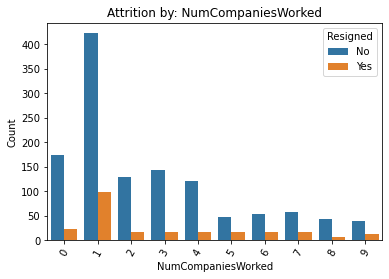

In [332]:
age_attrition = plot(attrition,'NumCompaniesWorked','Resigned',plt.xticks(rotation=60))


The number of companies worked had an opposite effect on the people that resigned. The employees that had only worked in one company resigned the most

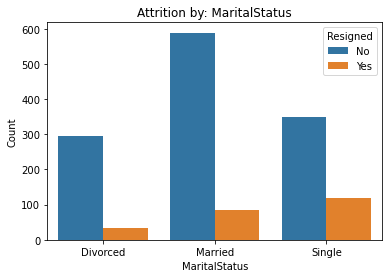

In [333]:
marital_status_attrition = plot(attrition,'MaritalStatus','Resigned')

There are more single people that resigned from the company.

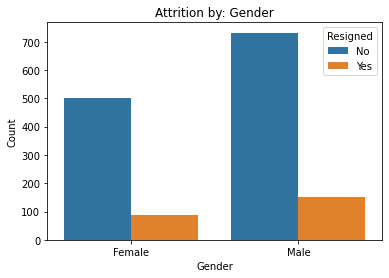

In [334]:
gender_attrition = plot(attrition,'Gender','Resigned')

There are more males that resigned from the company compared to the females

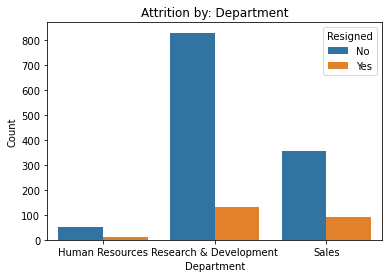

In [335]:
department_attrition = plot(attrition,'Department','Resigned')

Research and development department had the most resignation, closely followed by sales department

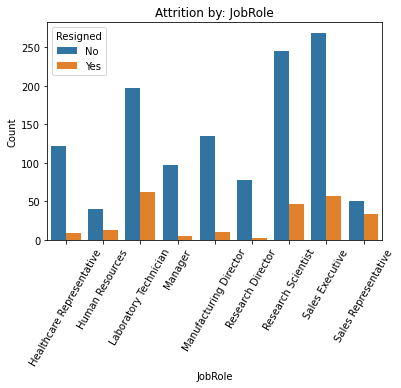

In [336]:
jobrole_attrition = plot(attrition,'JobRole','Resigned',plt.xticks(rotation=60))

Laboratory technicians had the highest resignations

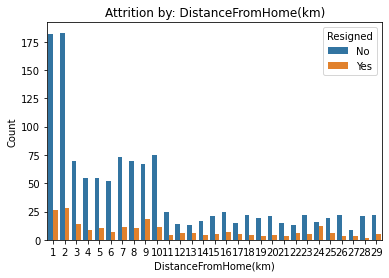

In [337]:
distance_attrition = plot(attrition,'DistanceFromHome(km)','Resigned')

The staff that stay closest to the office resigned the most

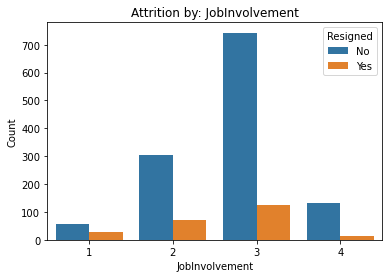

In [338]:
job_involvement_attrition = plot(attrition,'JobInvolvement','Resigned')

Job involvement directly affects attrition of staffs

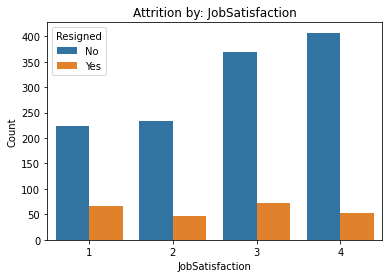

In [339]:
job_satisfaction_attrition = plot(attrition,'JobSatisfaction','Resigned')

Job satisfaction does not have a direct effect on the resignation of staffs

### Convert Categorical Variables to Numerical Variables

In [340]:
#import the library
from sklearn.preprocessing import LabelEncoder

In [341]:
#create an instance
label_encoder = LabelEncoder()

In [342]:
# attrition['Resigned'] = label_encoder.fit_transform(attrition['Resigned'])
attrition['BusinessTravel'] = label_encoder.fit_transform(attrition['BusinessTravel'])
attrition['Department'] = label_encoder.fit_transform(attrition['Department'])
attrition['EducationField'] = label_encoder.fit_transform(attrition['EducationField'])
attrition['Gender'] = label_encoder.fit_transform(attrition['Gender'])
attrition['JobRole'] = label_encoder.fit_transform(attrition['JobRole'])
attrition['MaritalStatus'] = label_encoder.fit_transform(attrition['MaritalStatus'])
attrition['Over18'] = label_encoder.fit_transform(attrition['Over18'])
attrition['OverTime'] = label_encoder.fit_transform(attrition['OverTime'])
attrition['StandardHours'] = label_encoder.fit_transform(attrition['StandardHours'])

We had to use Label encoder to transform non-numerical labels to numerical labels

In [343]:
#checking
attrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1470 non-null   int64   
 1   Resigned                  1470 non-null   category
 2   BusinessTravel            1470 non-null   int32   
 3   DailyRate($)              1470 non-null   int64   
 4   Department                1470 non-null   int32   
 5   DistanceFromHome(km)      1470 non-null   int64   
 6   EducationField            1470 non-null   int32   
 7   EmployeeNumber            1470 non-null   int64   
 8   EnvironmentSatisfaction   1470 non-null   int64   
 9   Gender                    1470 non-null   int32   
 10  HourlyRate                1470 non-null   int64   
 11  JobInvolvement            1470 non-null   int64   
 12  JobLevel                  1470 non-null   int64   
 13  JobRole                   1470 non-null   int32 

## Modelling

In [344]:
# Define a dictionary for the target mapping
target_map = {'Yes':1, 'No':0}
# Use the pandas apply method to numerically encode our attrition target variable
target = attrition["Resigned"].apply(lambda x: target_map[x])
target.head(3)

0    1
1    0
2    1
Name: Resigned, dtype: category
Categories (2, int64): [0, 1]

In [345]:
attrition['Resigned'] = label_encoder.fit_transform(attrition['Resigned'])

In [346]:
#load  the libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (accuracy_score, log_loss, classification_report,confusion_matrix)
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot


Inspecting the target variable

In [347]:
target.value_counts()

0    1233
1     237
Name: Resigned, dtype: int64

Class=1, n=237 (16.122%)
Class=0, n=1233 (83.878%)


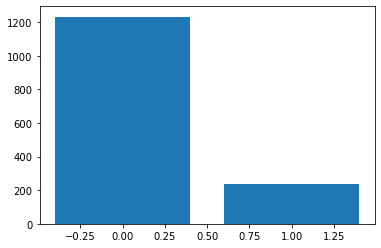

In [348]:
counter = Counter(target)
for k,v in counter.items():
    per = v / len(target) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

just by a quick inspection of the counts of the number of 'Yes' and 'No' in the target variable tells us that there is quite a large skew in target as shown in the figure

Now let us try and oversample the target class

Class=1, n=237 (16.122%)
Class=0, n=1233 (83.878%)


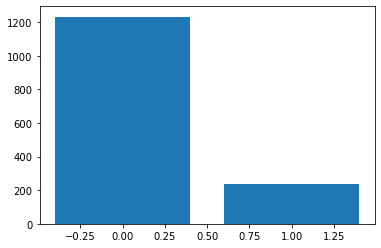

In [349]:
X =attrition.drop('Resigned',axis=1).values
y =  attrition['Resigned'].values

counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()



Class=1, n=1233 (50.000%)
Class=0, n=1233 (50.000%)


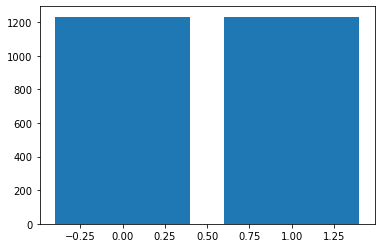

In [350]:
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

Now we have oversampled the minority class to solve the problem of imbalance

Now, lets build our model

In [351]:
#create a function that will split the data into training and test sets, and normalize the data
def get_data(target):

#get the features and the target
    features = attrition.drop(target,axis=1).values
    label = attrition[target].values
#split the data
    x_train,x_test,y_train,y_test = train_test_split(features,label,test_size=0.2,random_state=0)
#normalize the data
    scaler=MinMaxScaler()
    x_train_scaler= scaler.fit_transform(x_train)
    x_test_scaler = scaler.transform(x_test)

    return x_train_scaler,x_test_scaler,y_train,y_test



In [352]:
#calling the function
x_train_scaler,x_test_scaler,y_train,y_test = get_data('Resigned')

In [353]:
#check the shape of the data
x_train_scaler.shape,x_test_scaler.shape,y_train.shape,y_test.shape

((1176, 32), (294, 32), (1176,), (294,))

In [354]:
#function to model the data
def modelling(model_name):
#create an instance of the model    
    model = model_name
#train the model
    model.fit(x_train_scaler,y_train)
#get the training and testing accuracy 
    train_acc = model.score(x_train_scaler,y_train)
    test_acc = model.score(x_test_scaler,y_test)
#return the training and testing accuracy    
    return train_acc,test_acc

## Random Forest Classifier

In [355]:

#calling the function to model the data
train_acc,test_acc = modelling(RandomForestClassifier())

In [356]:
#print the accuracies
print("Train Accuracy:{:.3f}".format(train_acc))
print("Test Accuracy:{:.3f}".format(test_acc))

Train Accuracy:1.000
Test Accuracy:0.840


The random foret model overfits, in other words the training accuracy is more than the test accuracy. We would have to perform hyperparameter tuning to improve the performance

In [357]:
train_acc,test_acc = modelling(RandomForestClassifier(  n_jobs= -1,n_estimators = 1000, max_features = 0.3, max_depth = 3, min_samples_leaf = 2, random_state = 0, verbose = 0))

In [358]:
#print the accuracies
print("Train Accuracy:{:.3f}".format(train_acc))
print("Test Accuracy:{:.3f}".format(test_acc))

Train Accuracy:0.858
Test Accuracy:0.844


After tuning the model with a maximum depth of 3, number of estimators of 1000 ansd also setting a random state for reproducibility, the model performed better, even though it still slightly overfits

We would have to use other metrics to judge the performance of the model

### Model Prediction

In [359]:
#fucntion for model prediction 
def model_predict(model):
    Y_pred = model.predict(x_test_scaler)
    return Y_pred

In [367]:
# #create an instance of the model
rf= RandomForestClassifier(  n_jobs= -1,n_estimators = 1000, max_features = 0.3, max_depth = 3, min_samples_leaf = 2, random_state = 0, verbose = 0)
# #fit the model
rf.fit(x_train_scaler,y_train)

#make predictions on the test data
rf_pred = model_predict(rf)

In [368]:
rf_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

### Performance Metrics for Random Forest Classifier

In [369]:
print('Confusion Matrix: \n',confusion_matrix(y_test,rf_pred))
print(classification_report(y_test,rf_pred))
print('Random Forest Accuracy: ', accuracy_score(y_test, rf_pred))

Confusion Matrix: 
 [[245   0]
 [ 46   3]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       245
           1       1.00      0.06      0.12        49

    accuracy                           0.84       294
   macro avg       0.92      0.53      0.51       294
weighted avg       0.87      0.84      0.78       294

Random Forest Accuracy:  0.8435374149659864


Our model had a very high precision of 100% but the other metrics perfromed poorly

Recall - out of all the employees that resigned, the model predicted just 6% as having resign

Precision - out of all the employees that were predicted as having resigned ,the model correctly predicted 100%

True Positive - This implies that 245 customers resigned and the model correctly predicts that they resigned 

True Negative - 3 employees resigned and the model wrongly predicts that the employees resigned

False Positive -  the model wrongly predicts that 0 employees did not resign

False Negative - 46 customers resigned but the model incorrectly predicts that the customer did not resign

Let us examine the features and rank them in order of importance

## Feature Importance

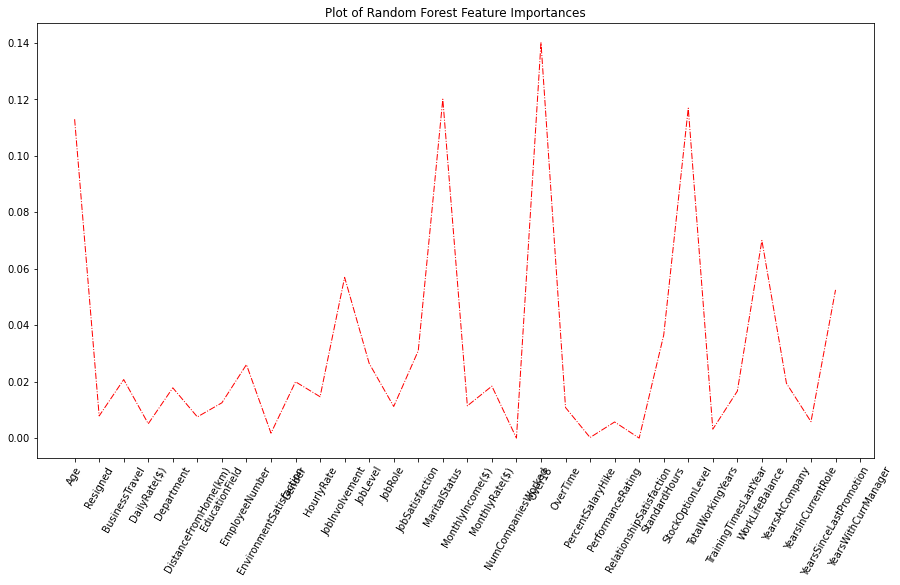

In [370]:
plt.figure(figsize=(15,8))
plt.plot(rf.feature_importances_,linestyle='dashdot', linewidth='1', color='red')
plt.xticks(range(attrition.shape[1]),attrition,rotation=60)
plt.title("Plot of Random Forest Feature Importances")
plt.show()

From the feature importance it shows that our most important feature is the Number of Companies Worked, then followed by Job satisfaction, standard hours, Training times last year and Hourly rate

Now let us build another ensemble model, to compare with the random forest model

## Gradient Boosting Model

In [371]:
#create a function that will split the data into training and test set
def get_data1(target):

#get the features and the target
    features = attrition.drop(target,axis=1).values
    label = attrition[target].values
#split the data
    x_train,x_test,y_train,y_test = train_test_split(features,label,test_size=0.2,random_state=0)


    return x_train,x_test,y_train,y_test

In [372]:
#call the function
x_train,x_test,y_train,y_test = get_data1('Resigned')

In [373]:
#function to model the data
def modelling1(model_name):
#create an instance of the model    
    model = model_name
#train the model
    model.fit(x_train,y_train)
#get the training and testing accuracy 
    train_acc = model.score(x_train,y_train)
    test_acc = model.score(x_test,y_test)
#return the training and testing accuracy    
    return train_acc,test_acc

In [374]:
train_acc,test_acc = modelling1(GradientBoostingClassifier())

In [375]:
#getting the accuracies
train_acc,test_acc

(0.9540816326530612, 0.8503401360544217)

The Gradient boosting model also overfits like the random forest, so we would tune for better performance

In [376]:
train_acc,test_acc = modelling(GradientBoostingClassifier( n_estimators= 1500, max_features = 0.9, max_depth = 4, min_samples_leaf = 2, random_state = 0, verbose = 0))

In [377]:
train_acc,test_acc

(1.0, 0.8469387755102041)

After tuning the model with a maximum depth of 4, number of estimators of 1500 ansd also setting a random state for reproducibility, the model performed better, even though it still slightly overfits

Now let us look at other metrics for evaluation

In [378]:
#fucntion for model prediction 
def model_predict(model):
    Y_pred = model.predict(x_test)
    return Y_pred

In [379]:
#create an instance of the model
gb = GradientBoostingClassifier(n_estimators= 1500, max_features = 0.9, max_depth = 4, min_samples_leaf = 2, random_state = 0, verbose = 0)
# #fit the model
gb.fit(x_train,y_train)

# #make predictions on the test data by calling the model-predict function
gb_pred = model_predict(gb)

In [380]:
gb_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0])

### Performance Metrics for Gradient Boosting Model

In [381]:
print('Confusion Matrix: \n',confusion_matrix(y_test,gb_pred))
print(classification_report(y_test,gb_pred))
print('Gradient Boosting Accuracy: ', accuracy_score(y_test, gb_pred))

Confusion Matrix: 
 [[232  13]
 [ 32  17]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       245
           1       0.57      0.35      0.43        49

    accuracy                           0.85       294
   macro avg       0.72      0.65      0.67       294
weighted avg       0.83      0.85      0.83       294

Gradient Boosting Accuracy:  0.8469387755102041


Recall - out of all the employees that resigned, the model predicted 35% as having resign

Precision - out of all the employees that were predicted as having resigned ,the model correctly predicted 57%

True Positive - This implies that 232 customers resigned and the model correctly predicts that they resigned 

True Negative - 17 employees resigned and the model wrongly predicts that the employees resigned

False Positive -  the model wrongly predicts that 13 employees did not resign

False Negative - 32 customers resigned but the model incorrectly predicts that the customer did not resign

## Feature Importance

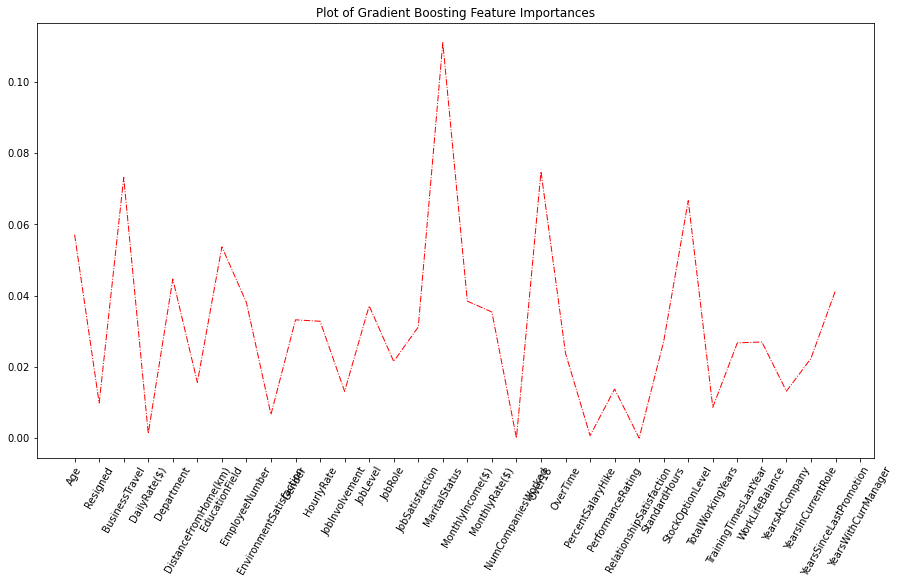

In [382]:
plt.figure(figsize=(15,8))
plt.plot(gb.feature_importances_,linestyle='dashdot', linewidth='1', color='red')
plt.xticks(range(attrition.shape[1]),attrition,rotation=60)
plt.title("Plot of Gradient Boosting Feature Importances")
plt.show()

From the feature importance it shows that our most important feature is the Job satisfaction, then followed by Number of Companies Worked, standard hours, Business Travel, and Distance from home

## Model Comparison

Here we compare the two models using accuracy,precision,recall,f1-score and confusion matrix score

In [384]:
df = {'Models': ["Random Forest", "Gradient Boost"],
        "Test Accuracy": [84, 85],
        "Precision": [100, 57],
        "Recall": [6, 35],
        "F1-score": [12, 43],
        "True Positive": [245, 232],
        "True Negative":[3, 17],
        "False Positive":[0, 13],
        "False Negative":[46, 32]}
model_comparison = pd.DataFrame(data = df)

# display the table of performance comparison
model_comparison

,Models,Test Accuracy,Precision,Recall,F1-score,True Positive,True Negative,False Positive,False Negative
0,Random Forest,84,100,6,12,245,3,0,46
1,Gradient Boost,85,57,35,43,232,17,13,32


## Conclusion

We have built a predictive model to predict employee attrition, from some basic Exploratory Data Analysis to feature engineering as well as implementing two tree based models in the form of a Random Forest and a Gradient Boosting classifier. 
The models were built with a balanced data. Also based on the F1-Scores and Recall of the models, the Gradient Boost model performed better than Random Forest model with an F1-score of 43% and Recall of 35%, although the Random Forest model had a better precision score of 100%. In terms of accuracy, Random Forest had the best generalised model. 
We also did some analysis and used feature importance to determine the most import reason for employee attrition.
Based on the analysis and some machine learning, we can conclude that Job satisfaction and Number of companies worked are the main reasons for attrition, and we can also predict which employees leave the company and then methodologies can be developed to retain employees.